In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Question 1

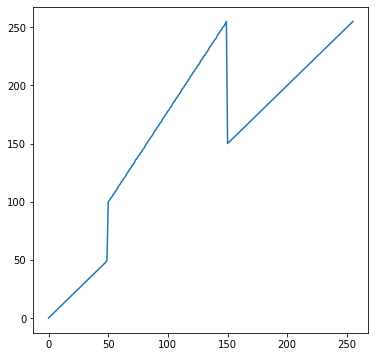

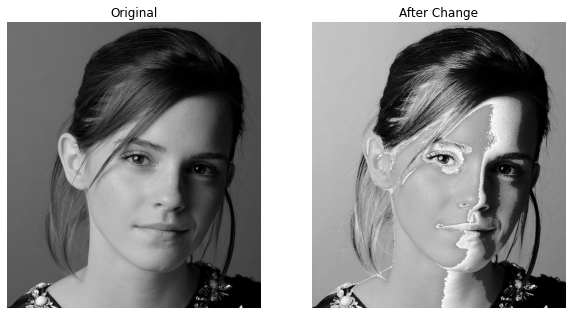

In [13]:
emma = cv.imread(r'images/emma_gray.jpg')
assert emma is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

table = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(table)

assert len(table)==256

output_emma = cv.LUT(emma,table)

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(cv.cvtColor(emma,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Original')
ax[1].imshow(cv.cvtColor(output_emma,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('After Change')

Question 2

256 256


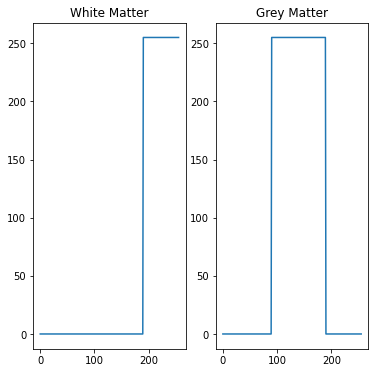

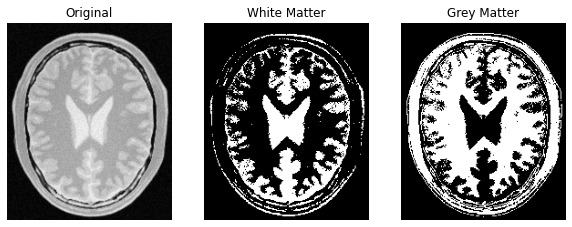

In [10]:
brain_image = cv.imread(r'images/brain_proton_density_slice.png')
assert brain_image is not None

t1_w = [0]*190
t2_w = [255]*66

t1_g = [0]*90
t2_g = [255]*100
t3_g = [0]*66

table_w = np.concatenate((t1_w,t2_w),axis=0).astype(np.uint8)
table_g = np.concatenate((t1_g,t2_g,t3_g),axis=0).astype(np.uint8)

fig,ax = plt.subplots(1,2,figsize=(6,6))
ax[0].plot(table_w)
ax[0].title.set_text('White Matter')
ax[1].plot(table_g)
ax[1].title.set_text('Grey Matter')

print(len(table_g),len(table_w))
assert len(table_w)==256
assert len(table_g)==256

white_brain = cv.LUT(brain_image,table_w)
grey_brain = cv.LUT(brain_image,table_g)

fig,ax = plt.subplots(1,3,figsize=(10,6))
ax[0].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Original')
ax[1].imshow(cv.cvtColor(white_brain,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('White Matter')
ax[2].imshow(cv.cvtColor(grey_brain,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text('Grey Matter')


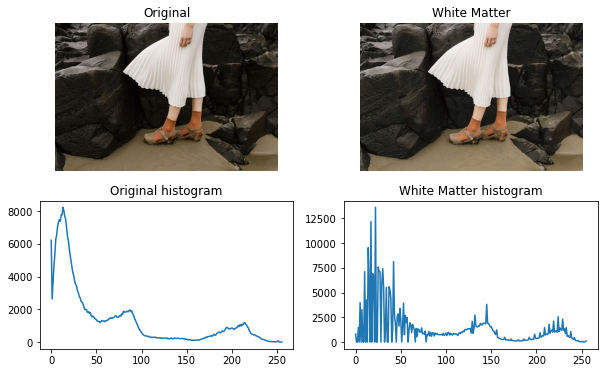

In [53]:
grey_image = cv.imread(r'images/highlights_and_shadows.jpg')
assert grey_image is not None

gamma = 0.8

lab_image = cv.cvtColor(grey_image,cv.COLOR_BGR2LAB)
(l,a,b) = cv.split(lab_image)
table = np.array([(pixel/255)**gamma*255 for pixel in range(0,256)]).astype(np.uint8)
output_l = cv.LUT(l,table)
output_grey = cv.merge([output_l,a,b])

grey_hist = cv.calcHist([grey_image] , [0] , None , [256] , [0 , 256])
output_grey_hist = cv.calcHist([output_grey] , [0] , None , [256] , [0 , 256])
fig,ax = plt.subplots(2,2,figsize=(10,6))
ax[0][0].imshow(cv.cvtColor(grey_image,cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].title.set_text('Original')
ax[0][1].imshow(cv.cvtColor(output_grey,cv.COLOR_LAB2RGB))
ax[0][1].axis('off')
ax[0][1].title.set_text('White Matter')
ax[1][0].plot(grey_hist)
ax[1][0].title.set_text('Original histogram')
ax[1][1].plot(output_grey_hist)
ax[1][1].title.set_text('White Matter histogram')


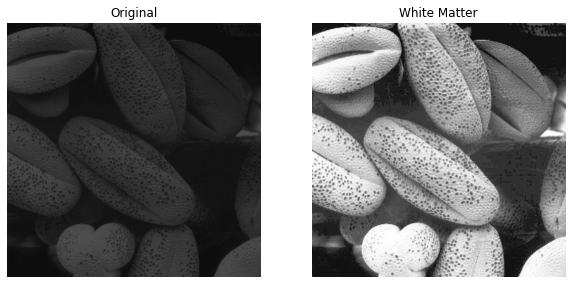

In [50]:
histo_image = cv.imread(r'images/shells.png',cv.IMREAD_GRAYSCALE)
assert histo_image is not None

def histogram_gen(image):
    histo = np.zeros(256)
    for row in image:
        for col in row:
            histo[col]+=1
    return histo

def equalize_histogram(image):
    hstgrm = histogram_gen(image)
    for i in range(1,len(hstgrm)):
        hstgrm[i] += hstgrm[i-1]
    M = len(image)
    N = len(image[0])
    L = 256
    lookuptable =  list(map(int,(L-1)*hstgrm/(M*N)))

    return lookuptable
    
def equalized_image(image):
    copy = image.copy()
    lookuptable = equalize_histogram(image)
    M = len(image)
    N = len(image[0])
    for i in range(M):
        for j in range(N):
            copy[i][j] = lookuptable[image[i][j]]
    return copy


# fig,ax = plt.subplots(1,2,figsize=(10,6))
# ax[0].plot(histo)
# ax[1].plot(eql)

output_histo = equalized_image(histo_image) 

fig,ax = plt.subplots(1,4,figsize=(10,6))
ax[0].imshow(cv.cvtColor(histo_image,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Original')
ax[1].imshow(cv.cvtColor(output_histo,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('Equalized Histogram')